# <center>Exploratory Data Analysis of Big Five Personality Test</center>

![](https://i.imgur.com/07rntJd.jpg?1)

<h3>What is Exploratory Data Analysis?</h3> 
<p><a href="https://www.ibm.com/cloud/learn/exploratory-data-analysis">Exploratory data analysis (EDA)</a> is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.</p>


<p>Here in this Exploratory Data Analysis (EDA) we are using Dataset from Kaggle <a href="https://www.kaggle.com/datasets/tunguz/big-five-personality-test">"Big Five Personality Test"</a> and The personality test was constructed with the "Big-Five Factor Markers" from the <a href="https://ipip.ori.org/newBigFive5broadKey.htm">International Personality Item Pool</a>, developed by Goldberg (1992). </p

<h3>Big Five personality traits</h3>
<p>The Big Five personality traits is a suggested taxonomy, or grouping, for personality traits, developed from the 1980s onward in psychological trait theory.</p> 
<p>When factor analysis (a statistical technique) is applied to personality survey data, it reveals semantic associations, which are words used to describe aspects of personality. These associations are often applied to the same person. For example, someone described as conscientious is more likely to be described as "always prepared" rather than "messy". These associations suggest five broad dimensions used in common language to describe the human personality, temperament and psyche.</p> 

<p>The differences between people’s personalities can be broken down in terms of five major traits—often called the “Big Five.” Each one reflects a key part of how a person thinks, feels, and behaves. The Big Five traits are:<p>

<ol>
<li>Openness to experience (includes aspects such as intellectual curiosity and creative imagination)</li>
<li>Conscientiousness (organization, productiveness, responsibility)</li>
<li>Extroversion (sociability, assertiveness; its opposite is Introversion)</li>
<li>Agreeableness (compassion, respectfulness, trust in others)</li>
<li>Neuroticism (tendencies toward anxiety and depression)</li>
</ol> 

<p>source: <a href="https://en.wikipedia.org/wiki/Big_Five_personality_traits">wikipedia</a></p>

<b> Project Outline : </b>

<ul>  
 <li>Install and Import the required libraries.</li>  
 <li>Data preparation and cleaning with pandas</li>  
 <li>Performing exploratory analysis and visualization</li>  
 <li>Asking and answering interesting questions</li>
 <li>Summarizing inferences and drawing conclusions</li>
</ul> 

## Install and Import the required libraries.

PIP is the standard package mangement system in Python, below are the packages we need to install for this project.

In [ ]:
!pip install -q jovian opendatasets pandas numpy folium matplotlib==3.2.2 plotly pycountry pycountry-convert country_converter --upgrade --q

- The below are the libraries that are imported

In [ ]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pycountry_convert as pc
import country_converter as coco
import os
%matplotlib inline

## Data preparation and cleaning with pandas

### Downloading the dataset 

- opendatasets is a Python library developed by Jovian for downloading datasets from online sources like Kaggle and Google Drive.

In [ ]:
od.download("https://www.kaggle.com/datasets/tunguz/big-five-personality-test")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kallurivasanthsai
Your Kaggle Key: ··········


100%|██████████| 159M/159M [00:01<00:00, 105MB/s] 


In [ ]:
os.listdir("./big-five-personality-test/IPIP-FFM-data-8Nov2018")

['codebook.txt', '.directory', 'data-final.csv']

### Extracting the questions from the code book provided.

In [ ]:
codebook_path = "./big-five-personality-test/IPIP-FFM-data-8Nov2018/codebook.txt"
question_dict = dict()
def parse_question(text):
    trait_type , question_text = text.split("\t")
    question_dict[trait_type.strip()]=question_text.strip()
    
with open(codebook_path,"r") as file:
    file_text = file.readlines()[7:57]
    for question_text in file_text:
        parse_question(question_text)
question_df = pd.DataFrame(list(question_dict.items()),columns=["column-name","question-text"])  
question_df.head()

,column-name,question-text
0,EXT1,I am the life of the party.
1,EXT2,I don't talk a lot.
2,EXT3,I feel comfortable around people.
3,EXT4,I keep in the background.
4,EXT5,I start conversations.


- The answer values in the survey from the codebook

In [ ]:
answers_dict = {
    1:"Disagree",
    2:"Slightly Disagree", 
    3:"Neutral", 
    4:"Slightly Agree",
    5:"Agree"
}

### Load the dataset to pandas DataFrame

<p>As per the codebook  provided with the dataset, This data was collected (2016-2018) through an interactive on-line personality test.
The personality test was constructed with the "Big-Five Factor Markers" from the IPIP. <a href="https://ipip.ori.org/newBigFive5broadKey.htm">https://ipip.ori.org/newBigFive5broadKey.htm</a>
Participants were informed that their responses would be recorded and used for research at the beginning of the test, and asked to confirm their consent at the end of the test.

The following items were presented on one page and each was rated on a five point scale using radio buttons. The order on page was was EXT1, AGR1, CSN1, EST1, OPN1, EXT2, etc.
The scale was labeled 1=Disagree, 3=Neutral, 5=Agree
</P>
<p>Now we going to create a list of column names containing the answers from the test and load these columns. The five Personality traits are labeled as follows
</p> 
<ol>
<li>EXT: Extroversion</li>
<li>EST: Neuroticism</li>
<li>AGR: Agreeableness</li>
<li>CSN: Conscientiousness</li>
<li>OPN: Openness</li>
</ol>
<p>Each trait again has 10 questions ranging from 1-10</p>


In [ ]:
#CSV file path
datset_csv_path = "./big-five-personality-test/IPIP-FFM-data-8Nov2018/data-final.csv"

#selecting the required columns
col_type = {
    "Extraversion":"EXT",
    "EmotionalStability":"EST",
    "Agreeableness":"AGR",
    "Conscientiousness":"CSN",
    "Openness":"OPN"
    }
selected_cols = [type+str(i) for type in col_type.values() for i in range(1,11)]
selected_cols.extend(["country","IPC"])

len(selected_cols)

52

In [ ]:
%%time
big_five_df = pd.read_csv(datset_csv_path,
                          usecols=selected_cols,
                          sep="\t",
                          #nrows=1000
                          )

CPU times: user 5.95 s, sys: 952 ms, total: 6.9 s
Wall time: 7.41 s


### View and clean the dataset

In [ ]:
big_five_df.shape

(1015341, 52)

In [ ]:
big_five_df.sample(5)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,IPC,country
464194,2.0,4.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,5.0,...,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,1,US
237189,3.0,4.0,3.0,4.0,3.0,2.0,2.0,5.0,1.0,4.0,...,5.0,1.0,5.0,1.0,4.0,4.0,5.0,5.0,1,NL
867496,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,...,4.0,2.0,3.0,2.0,4.0,2.0,4.0,4.0,1,US
240700,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,2.0,3.0,...,5.0,4.0,3.0,1.0,3.0,2.0,4.0,3.0,1,AU
403940,3.0,2.0,4.0,2.0,5.0,2.0,5.0,3.0,3.0,2.0,...,2.0,2.0,3.0,2.0,3.0,2.0,5.0,5.0,2,US


In [ ]:
big_five_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 52 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013558 non-null  float64
 1   EXT2     1013558 non-null  float64
 2   EXT3     1013558 non-null  float64
 3   EXT4     1013558 non-null  float64
 4   EXT5     1013558 non-null  float64
 5   EXT6     1013558 non-null  float64
 6   EXT7     1013558 non-null  float64
 7   EXT8     1013558 non-null  float64
 8   EXT9     1013558 non-null  float64
 9   EXT10    1013558 non-null  float64
 10  EST1     1013558 non-null  float64
 11  EST2     1013558 non-null  float64
 12  EST3     1013558 non-null  float64
 13  EST4     1013558 non-null  float64
 14  EST5     1013558 non-null  float64
 15  EST6     1013558 non-null  float64
 16  EST7     1013558 non-null  float64
 17  EST8     1013558 non-null  float64
 18  EST9     1013558 non-null  float64
 19  EST10    1013558 non-null  float64
 20  AG

The answer columns would contain the numbers from 1-5 , so we can use `int16` inplace of `int64`





In [ ]:
big_five_df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,IPC
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,...,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.015341e+06
mean,2.648067e+00,2.773115e+00,3.288349e+00,3.140595e+00,3.276960e+00,2.401100e+00,2.771744e+00,3.414818e+00,2.963740e+00,3.556469e+00,...,2.075933e+00,4.000068e+00,1.999891e+00,3.792905e+00,1.894605e+00,3.976375e+00,3.182453e+00,4.122993e+00,3.958441e+00,1.045211e+01
std,1.264407e+00,1.323943e+00,1.215006e+00,1.237442e+00,1.277593e+00,1.225721e+00,1.400336e+00,1.271915e+00,1.346040e+00,1.305232e+00,...,1.112600e+00,1.097169e+00,1.090239e+00,9.923859e-01,1.104125e+00,1.008505e+00,1.255374e+00,1.041216e+00,1.034491e+00,3.982879e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,1.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,2.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,3.000000e+00,5.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,2.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,7.250000e+02


<p>The answer columns contains min value as "0" which are incorrect and `IPC` column means "The number of records from the user's IP address in the dataset" and it contains max of 276 which means that the test was attempted multiple times from the single IP address.we will consider the rows with IPC = 1 for max cleanliness </p>
<p>As we have a huge number of rows, we can afford to drop the rows with any null data.</p>

In [ ]:
big_five_df.dropna(inplace=True)

<p>Removing the "NONE" value rows from the country column and converting it categorical column </p> 

In [ ]:
none_val_filt = big_five_df["country"] == "NONE"
big_five_df = big_five_df[~none_val_filt]
big_five_df.shape

(999760, 52)

<p>Removing the rows where the answer columns are zero.</p>

In [ ]:
non_zero_filt = (big_five_df != 0).all(axis=1)
big_five_df = big_five_df[non_zero_filt]
big_five_df.shape

(862710, 52)

<p>Removing the rows with IPC > 1</p>

In [ ]:
ipc_filt = big_five_df["IPC"] == 1
big_five_df = big_five_df[ipc_filt]
big_five_df.shape

(595071, 52)

<p>changing the size of the integer column values</p>

In [ ]:
integer_cols = selected_cols.copy()
integer_cols.remove("country")
len(integer_cols)

51

In [ ]:
big_five_df[integer_cols] = big_five_df[integer_cols].astype("int16")

In [ ]:
big_five_df.dtypes

EXT1        int16
EXT2        int16
EXT3        int16
EXT4        int16
EXT5        int16
EXT6        int16
EXT7        int16
EXT8        int16
EXT9        int16
EXT10       int16
EST1        int16
EST2        int16
EST3        int16
EST4        int16
EST5        int16
EST6        int16
EST7        int16
EST8        int16
EST9        int16
EST10       int16
AGR1        int16
AGR2        int16
AGR3        int16
AGR4        int16
AGR5        int16
AGR6        int16
AGR7        int16
AGR8        int16
AGR9        int16
AGR10       int16
CSN1        int16
CSN2        int16
CSN3        int16
CSN4        int16
CSN5        int16
CSN6        int16
CSN7        int16
CSN8        int16
CSN9        int16
CSN10       int16
OPN1        int16
OPN2        int16
OPN3        int16
OPN4        int16
OPN5        int16
OPN6        int16
OPN7        int16
OPN8        int16
OPN9        int16
OPN10       int16
IPC         int16
country    object
dtype: object

## Performing exploratory analysis and visualization

<p>In this Exploratory Data analysis we are analysing the below Traits. </p>

- <strong>Extraversion (EXT)</strong> is the personality trait of seeking fulfillment from sources outside the self or in community. 
- <strong>Agreeableness (AGR)</strong> reflects much individuals adjust their behavior to suit others. 
- <strong>Conscientiousness (CSN)</strong> is the personality trait of being honest and hardworking. 
- <strong>Neuroticism or Emotional Stability(EST)</strong> is the personality trait of being emotional.
- <strong>Openness to Experience (OPN)</strong> is the personality trait of seeking new experience and intellectual pursuits.



To analyze the questions in the survey we will plot the pie charts for the questions, Below are the function's to plot the pie chart of a question. The answer value in the survey for these questions is in the range of (1-5).

In [ ]:
def pie_chart(data,axes,title_text):
    """To draw the pie chart based on the data and axes"""
    axes.pie(data["count"],
             labels=data["text"],
             autopct='%1.2f%%')
    axes.set(title=title_text)


def create_pie_chart(trait): 
    """To create the data to draw a Pie chart"""
    #Creating the list of trait columns
    trait_columns = [col_type[trait]+str(i) for i in range(1,11)]

    #Creating the list of axes for subplots
    axis_tuple = set((i,j) for i in range(2) for j in range(5))

    #Creating the figure and subplots
    fig , axes = plt.subplots(ncols=5,nrows=2,figsize=(30,15),)

    for column,ax in zip(trait_columns,axis_tuple):
        data =  big_five_df[column].value_counts().reset_index().sort_values(by="index")
        data.columns = ["answer","count"]
        data["text"] = data["answer"].replace(answers_dict)
        title = question_dict[column]
        pie_chart(data,axes[ax],title)
    fig.suptitle(f"{trait} Answer analysis",fontsize=16,fontweight="bold")
    fig.show();


### Extraversion Questions In the survey

- Extraversion (or extroversion) is characterized by excitability, sociability, talkativeness, assertiveness, and high amounts of emotional expressiveness.
- People who are high in extraversion are outgoing and tend to gain energy in social situations. Being around other people helps them feel energized and excited.
- People who are low in extraversion (or introverted) tend to be more reserved and have less energy to expend in social settings. Social events can feel draining and introverts often require a period of solitude and quiet in order to "recharge."

<p> Below are the Extraversion questions that are given in the survey</p>

<table>
<tr><th colspan='2'>Extraversion</th></tr> 
<tr><td>
<table>
<tr><th>Trait column</th><th>Question in the survey</th><td>Key(+/-)</td></tr>
<tr><td>EXT1</td><td>I am the life of the party.</td><td>+</td></tr>
<tr><td>EXT2</td><td>I don't talk a lot.</td><td>-</td></tr>
<tr><td>EXT3</td><td>I feel comfortable around people.</td><td>+</td></tr>
<tr><td>EXT4</td><td>I keep in the background.</td><td>-</td></tr>
<tr><td>EXT5</td><td>I start conversations.</td><td>+</td></tr>
</table> 
</td>
<td>
<table>
<tr><th>Trait column</th><th>Question in the survey</th><td>Key(+/-)</td></tr>
<tr><td>EXT6</td><td>I have little to say.</td><td>-</td></tr>
<tr><td>EXT7</td><td>I talk to a lot of different people at parties.</td><td>+</td></tr>
<tr><td>EXT8</td><td>I don't like to draw attention to myself.</td><td>-</td></tr>
<tr><td>EXT9</td><td>I don't mind being the center of attention.</td><td>+</td></tr>
<tr><td>EXT10</td><td>I am quiet around strangers.</td><td>-</td></tr> 
</table> 
</td></tr> 
</table> 

 <p>To analyze the responses to these questions in the survey we will plot the pie chart for each question.</p>

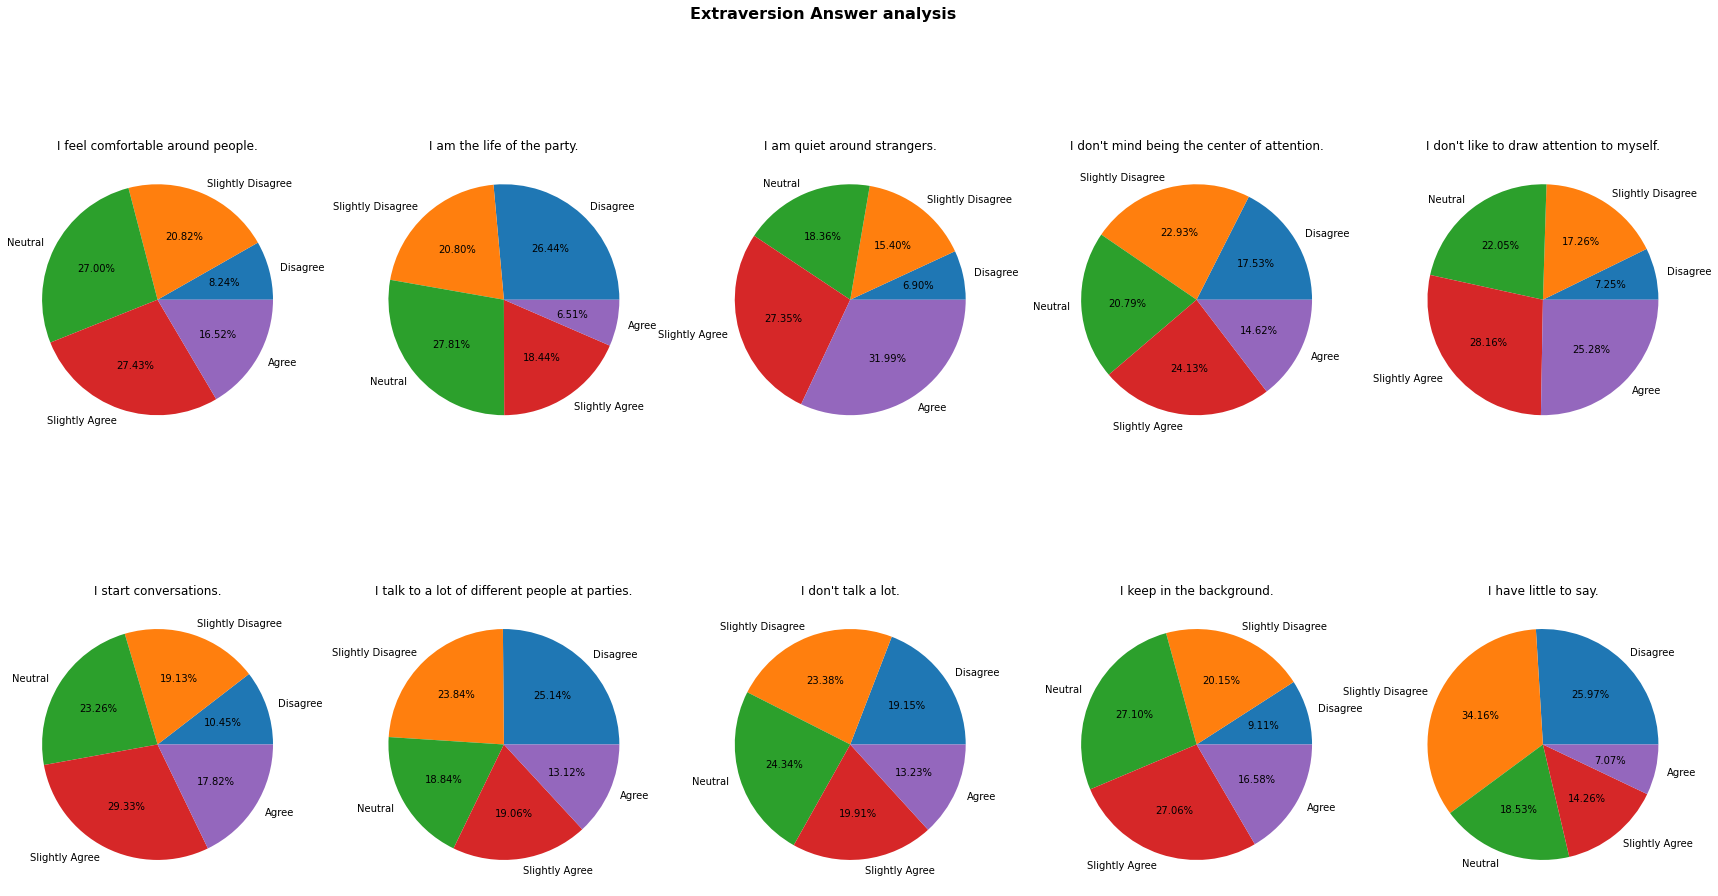

In [ ]:
create_pie_chart("Extraversion")

- The percentage of strong agreement or disagreement with the questions is relatively low among most of the Extraversion questions.
- Nearly 60% of the respondents stated that they are quiet among strangers and about 55% stated that they don't like to draw attention to themselves. 
- About 22% of the respondents remained neutral about the Extraversion questions.

### Agreeableness Questions in the survey.

- This personality dimension includes attributes such as trust, altruism, kindness, affection, and other prosocial behaviors.
- People who are high in agreeableness tend to be more cooperative while those low in this trait tend to be more competitive and sometimes even manipulative.

<p> Below are the Agreeableness questions that are given in the survey</p>

<table>
<tr><th colspan='2'>Agreeableness</th></tr> 
<tr><td>
<table>
<tr><th>Trait column</th><th>Question in the survey</th><td>Key(+/-)</td></tr>
<tr><td>AGR1</td><td>I feel little concern for others.</td><td>-</td></tr>
<tr><td>AGR2</td><td>I am interested in people.</td><td>+</td></tr>
<tr><td>AGR3</td><td>I insult people.</td><td>-</td></tr>
<tr><td>AGR4</td><td>I sympathize with others' feelings.</td><td>+</td></tr>
<tr><td>AGR5</td><td>I am not interested in other people's problems.</td><td>-</td></tr>
</table> 
</td>
<td>
<table>
<tr><th>Trait column</th><th>Question in the survey</th><td>Key(+/-)</td></tr>
<tr><td>AGR6</td><td>I have a soft heart.</td><td>+</td></tr>
<tr><td>AGR7</td><td>I am not really interested in others.</td><td>-</td></tr>
<tr><td>AGR8</td><td>I take time out for others.</td><td>+</td></tr>
<tr><td>AGR9</td><td>I feel others' emotions.</td><td>+</td></tr>
<tr><td>AGR10</td><td>I make people feel at ease.</td><td>+</td></tr> 
</table> 
</td></tr> 
</table> 

To analyze the responses to these questions in the survey we will plot the pie chart for each question.

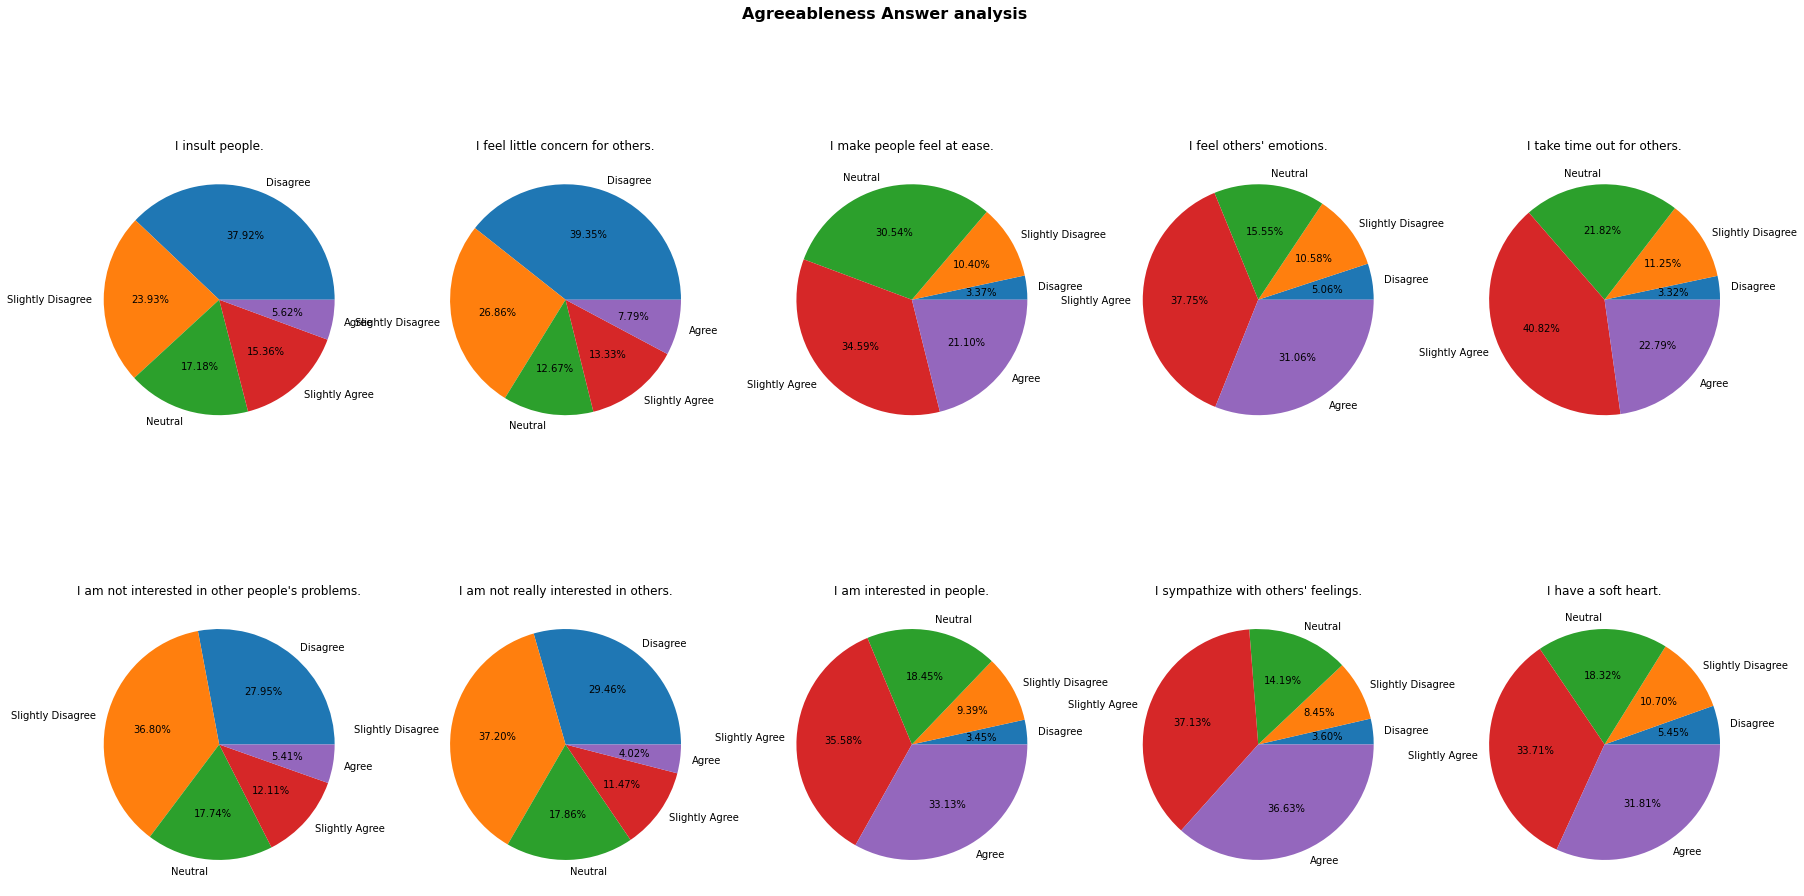

In [ ]:
create_pie_chart("Agreeableness")

- The percentage of agreement with the positive questions and disagreement with the negative questions is very high in all the Agreeableness questions, Thus stating that most of the respondents tend to be compassionate rather than antagonistic.
- However, the questions seemed to be antagonistic which might have led the respondents to answer these questions more positively.
- About 18% of the respondents remained neutral about the Agreeableness questions.

### Conscientiousness Questions in the survey.

- Standard features of this dimension include high levels of thoughtfulness, good impulse control, and goal-directed behaviors.
- Highly conscientious people tend to be organized and mindful of details. They plan ahead, think about how their behavior affects others, and are mindful of deadlines.

<p> Below are the Conscientiousness questions that are given in the survey</p>

<table>
<tr><th colspan='2'>Conscientiousness</th></tr> 
<tr><td>
<table>
<tr><th>Trait column</th><th>Question in the survey</th><td>Key(+/-)</td></tr>
<tr><td>CSN1</td><td>I am always prepared.</td><td>+</td></tr>
<tr><td>CSN2</td><td>I leave my belongings around.</td><td>-</td></tr>
<tr><td>CSN3</td><td>I pay attention to details.</td><td>+</td></tr>
<tr><td>CSN4</td><td>I make a mess of things.</td><td>-</td></tr>
<tr><td>CSN5</td><td>I get chores done right away.</td><td>+</td></tr>
</table> 
</td>
<td>
<table>
<tr><th>Trait column</th><th>Question in the survey</th><td>Key(+/-)</td></tr>
<tr><td>CSN6</td><td>I often forget to put things back in their proper place.</td><td>-</td></tr>
<tr><td>CSN7</td><td>I like order.</td><td>+</td></tr>
<tr><td>CSN8</td><td>I shirk my duties.</td><td>-</td></tr>
<tr><td>CSN9</td><td>I follow a schedule.</td><td>+</td></tr>
<tr><td>CSN10</td><td>I am exacting in my work.</td><td>+</td></tr>
</table> 
</td></tr> 
</table>  

To analyze the responses to these questions in the survey we will plot the pie chart for each question.

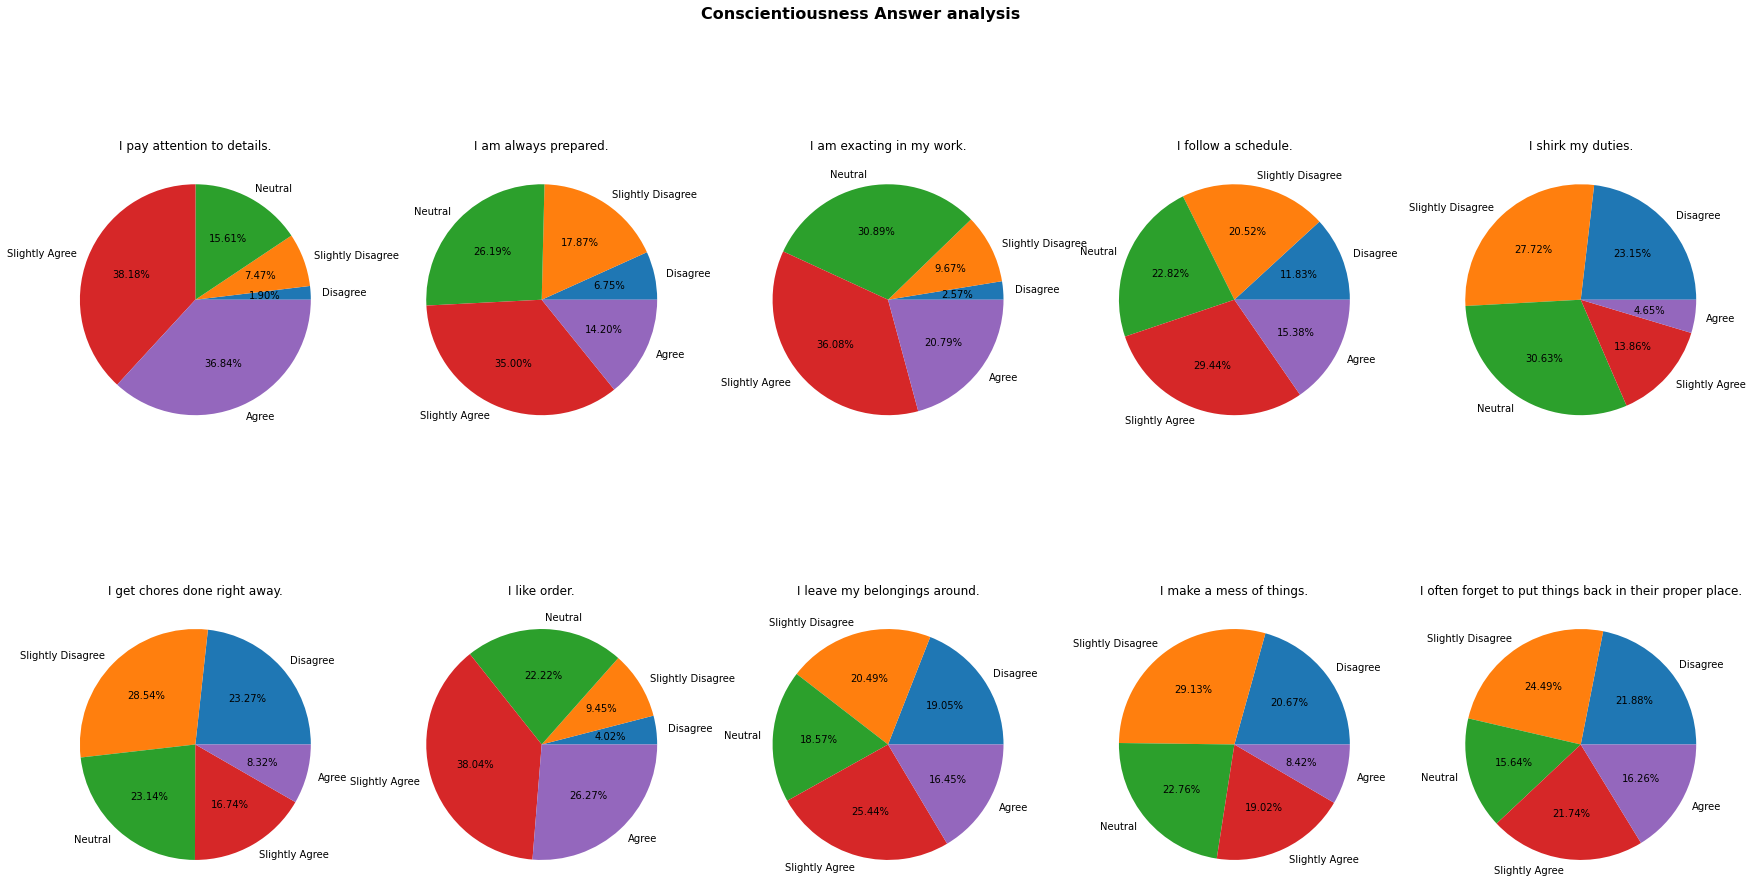

In [ ]:
create_pie_chart("Conscientiousness")

- Nearly 75% of the respondents stated that they like to pay attention to details, and about 65% stated that they like things in order.
- About 25% of the respondents remained neutral about the Conscientiousness questions.  
- Most of the negative Conscientiousness questions are equally distributed among the answers.


### Neuroticism or Emotional Stability Questions in the survey

- Neuroticism is a trait characterized by sadness, moodiness, and emotional instability.
- Individuals who are high in this trait tend to experience mood swings, anxiety, irritability, and sadness.
- Those low in this trait tend to be more stable and emotionally resilient.

<p> Below are the Neuroticism questions that are given in the survey</p>

<table>
<tr><th colspan='2'>Neuroticism (EmotionalStability)</th></tr> 
<tr><td>
<table>
<tr><th>Trait column</th><th>Question in the survey</th><td>Key(+/-)</td></tr>
<tr><td>EST1</td><td>I get stressed out easily.</td><td>-</td></tr>
<tr><td>EST2</td><td>I am relaxed most of the time.</td><td>+</td></tr>
<tr><td>EST3</td><td>I worry about things.</td><td>-</td></tr>
<tr><td>EST4</td><td>I seldom feel blue.</td><td>+</td></tr>
<tr><td>EST5</td><td>I am easily disturbed.</td><td>-</td></tr>
</table> 
</td>
<td>
<table>
<tr><th>Trait column</th><th>Question in the survey</th><td>Key(+/-)</td></tr>
<tr><td>EST6</td><td>I get upset easily.</td><td>-</td></tr>
<tr><td>EST7</td><td>I change my mood a lot.</td><td>-</td></tr>
<tr><td>EST8</td><td>I have frequent mood swings.</td><td>-</td></tr>
<tr><td>EST9</td><td>I get irritated easily.</td><td>-</td></tr>
<tr><td>EST10</td><td>I often feel blue.</td><td>-</td></tr>
</table> 
</td></tr> 
</table>  

To analyze the responses to these questions in the survey we will plot the pie chart for each question.

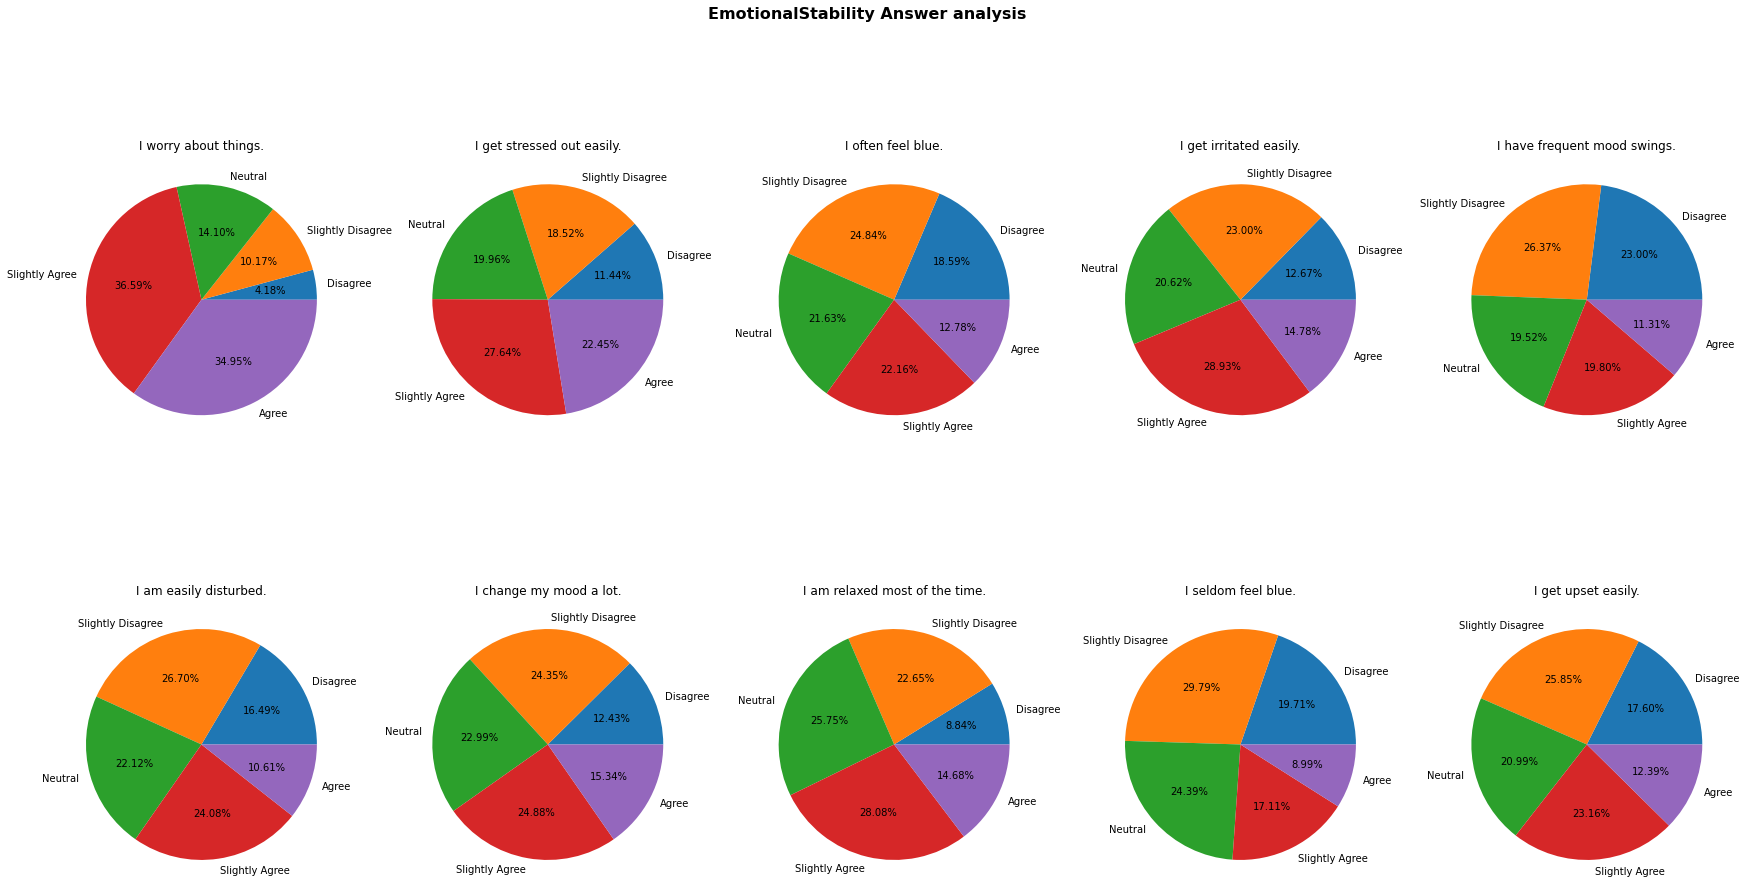

In [ ]:
create_pie_chart("EmotionalStability")

- The percentage of strong agreement or disagreement with the questions is relatively low among most of the Neuroticism questions.
- Nearly 72% of the respondents stated that they worry about things and about 50% stated that they get stressed out easily.
- About 21% of the respondents remained neutral about the EmotionalStability questions.

### Openness Questions in the survey

- This trait features characteristics such as imagination and insight.
- People who are high in this trait also tend to have a broad range of interests. They are curious about the world and other people and eager to learn new things and enjoy new experiences. 
- People low in this trait are often much more traditional and may struggle with abstract thinking.

<p> Below are the Neuroticism questions that are given in the survey</p>


<table>
<tr><th colspan='2'>Openness to Experience</th></tr> 
<tr><td>
<table>
<tr><th>Trait column</th><th>Question in the survey</th><td>Key(+/-)</td></tr>
<tr><td>OPN1</td><td>I have a rich vocabulary.</td><td>+</td></tr>
<tr><td>OPN2</td><td>I have difficulty understanding abstract ideas.</td><td>-</td></tr>
<tr><td>OPN3</td><td>I have a vivid imagination.</td><td>+</td></tr>
<tr><td>OPN4</td><td>I am not interested in abstract ideas.</td><td>-</td></tr>
<tr><td>OPN5</td><td>I have excellent ideas.</td><td>+</td></tr>
</table> 
</td>
<td>
<table>
<tr><th>Trait column</th><th>Question in the survey</th><td>Key(+/-)</td></tr>
<tr><td>OPN6</td><td>I do not have a good imagination.</td><td>-</td></tr>
<tr><td>OPN7</td><td>I am quick to understand things.</td><td>+</td></tr>
<tr><td>OPN8</td><td>I use difficult words.</td><td>+</td></tr>
<tr><td>OPN9</td><td>I spend time reflecting on things.</td><td>+</td></tr>
<tr><td>OPN10</td><td>I am full of ideas.</td><td>+</td></tr>
</table> 
</td></tr> 
</table> 

To analyze the responses to these questions in the survey we will plot the pie chart for each question.

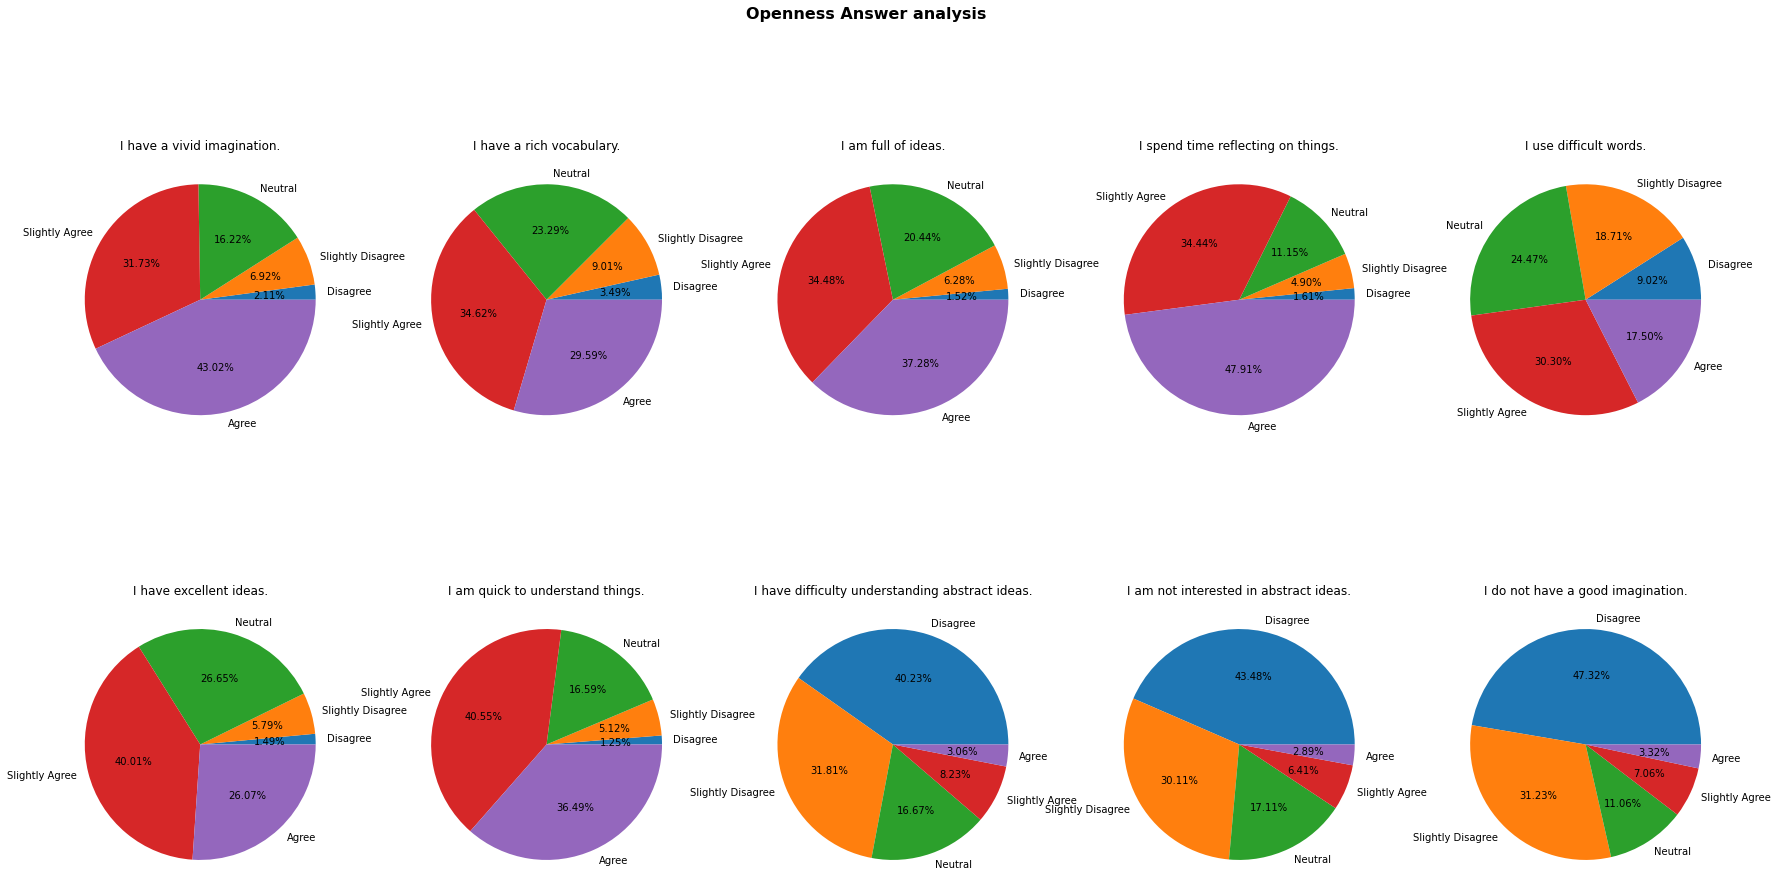

In [ ]:
create_pie_chart("Openness")

- The percentage of agreement with the positive questions and disagreement with the negative questions is very high in all the Openness questions, Thus stating that most of the respondents are curious and inventive.
- About 18% of the respondents remained neutral about the Openness questions.

### Country of the participant.

- The countries given in the dataset are of ISO2 standard we will convert them to ISO3,short name and classify them according to continents.

In [ ]:
countries_iso2 = list(big_five_df["country"].unique())
unknown_vals = ["AQ","SX","TL"] 
countries_iso3 = coco.convert(names = countries_iso2, to = "ISO3")
short_name = coco.convert(names = countries_iso2, to = "name_short")

In [ ]:
countries_dict = dict(zip(countries_iso2,countries_iso3))
short_name_dict = dict(zip(countries_iso2,short_name))

- Mapping the continents to counties

In [ ]:
country_series = pd.Series(countries_iso2)[~pd.Series(countries_iso2).isin(unknown_vals)]
continent_series = country_series.apply(lambda x:pc.country_alpha2_to_continent_code(x))

In [ ]:
continent_dict = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'EU': 'Europe',
    'AF': 'Africa'
}
continent_series = continent_series.replace(continent_dict)
continent_dict = dict(zip(list(country_series),list(continent_series)))

- Mapping ISO3, short_name,continent to the ISO2 country in the Dataset.

In [ ]:
big_five_df.rename(columns={"country":"country-iso2"},inplace=True)


In [ ]:
big_five_df["country-iso3"]   = big_five_df["country-iso2"].replace(countries_dict)
big_five_df["country-short"]  = big_five_df["country-iso2"].replace(short_name_dict)
big_five_df["continent"]      = big_five_df["country-iso2"].replace(continent_dict)

In [ ]:
big_five_df.loc[(big_five_df["continent"] == "TL"),["continent"]] = "Asia"
big_five_df.loc[(big_five_df["continent"] == "SX"),["continent"]] = "Europe"
big_five_df = big_five_df[~(big_five_df["continent"] == "AQ")]

In [ ]:
big_five_df["continent"].value_counts()

North America    350544
Europe           129243
Asia              56946
Australia         36345
South America     15579
Africa             6412
Name: continent, dtype: int64

In [ ]:
country_cols = ["country-iso2","country-iso3","country-short","continent"] 
big_five_df[country_cols] = big_five_df[country_cols].astype("category")

- The below Tree graph show the different countries that are participated in the survey.

In [ ]:
country_table = big_five_df["country-iso2"].value_counts()
country_table = country_table.to_frame("count")

In [ ]:

country_table["country-iso2"]  = country_table.index
country_table["country-short"] = country_table["country-iso2"].replace(short_name_dict)
country_table["country-iso3"]  = country_table["country-iso2"].replace(countries_dict)
country_table["continent"]     = country_table["country-iso2"].replace(continent_dict)
country_table["count_log"] = country_table["count"].apply(np.log)

In [ ]:
fig = px.treemap(country_table, 
                 path=[px.Constant("world"), 'continent', 'country-short'], 
                 values='count',
                 color='count',
                 title="TreeMap showing the No of responses around the world.", 
                 hover_data=['country-iso3'],
                 color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show();

In [ ]:
fig = px.choropleth(country_table, 
                    locations="country-short",
                    color="count_log", 
                    hover_name="country-short", #
                    hover_data=['count','country-short','continent'], 
                    color_continuous_scale='viridis', 
                    title='Distribution of No of responses around the World',
                    locationmode= 'country names' ,
                    projection='natural earth',
                    scope ='world') 
fig.show()

- Most of the respondents are from the United States followed by UK and Canada. 
- The dark regions in the above map indicate the lower responses, most of them are African countries.

## Asking and answering interesting questions.

<p>Q1: What are the raw scores of the participants of different traits and how they are the distributed?</p>
<p>Q2: Is there any corrleation between different Traits?</p> 
<p>Q3: what are the top 10 and bottom 10 countries that participated in the survey?</p> 
<p>Q4: Are there any countries which are in the top 10 in all the Traits?</p>
<p>Q5: what is distribution of raw scores for different traits around the world? what does this show?</p>
<p>Q6: How the personality traits varies between the continents?</p>
<p></p>
<p>Q7: How much percentage of people answered Neutral, Agree and Disagree for more than 15 questions?</p>
<p>Q8: what are the questions that are answered as agreed or disagreed most across all the traits?</p>


### Q1: What are the raw scores of the participants of different traits and how they are the distributed?


- To analyze the Traits of the participants. we need to caluclate the raw scores for each individual Traits by using the answer values for each participant.we have formulae to calulate the raw scores. The answer value ranges from 1-5 and based on th nature of the question each question has positive or neagtive key which is used while caluclating the raw Trait scores.

- we have considered the Formula for calculating the raw scores from https://openpsychometrics.org/printable/big-five-personality-test.pdf which are given below 

<p>EXT = 20 + (1) ___ - (6) ___ + (11) ___ - (16) ___ + (21) ___ - (26) ___ + (31) ___ - (36) ___ + (41) ___ - (46) ___ = _____</p>
<p>AGR = 14 - (2) ___ + (7) ___ - (12) ___ + (17) ___ - (22) ___ + (27) ___ - (32) ___ + (37) ___ + (42) ___ + (47) ___ = _____</p>
<p>CSN = 14 + (3) ___ - (8) ___ + (13) ___ - (18) ___ + (23) ___ - (28) ___ + (33) ___ - (38) ___ + (43) ___ + (48) ___ = _____</p>
<p>EST = 38 - (4) ___ + (9) ___ - (14) ___ + (19) ___ - (24) ___ - (29) ___ - (34) ___ - (39) ___ - (44) ___ - (49) ___ = _____</p>
<p>OPN = 8 + (5) ___ - (10) ___ + (15) ___ - (20) ___ + (25) ___ - (30) ___ + (35) ___ + (40) ___ + (45) ___ + (50) ___ = _____ </p>

- we will define fucnctions to calulate the raw score for each trait.

In [ ]:
def getExtraversionScore(df):
    """To Calcualte the Extraversion Score"""
    ExtraversionScore = 0
    ExtraversionScore = 20 + df['EXT1'] - df['EXT2'] + df['EXT3'] - df['EXT4'] + df['EXT5'] - df['EXT6'] + df['EXT7'] - df['EXT8'] + df['EXT9'] - df['EXT10']
    return ExtraversionScore

def getAgreeablenessScore(df):
    """To Calcualte the Agreeableness Score"""
    AgreeablenessScore = 0
    AgreeablenessScore = 14 - df['AGR1'] + df['AGR2'] - df['AGR3'] + df['AGR4'] - df['AGR5'] + df['AGR6'] - df['AGR7'] + df['AGR8'] + df['AGR9'] + df['AGR10']
    return AgreeablenessScore

def getConscientiousnessScore(df):
    """To Calcualte the Conscientiousness Score"""
    ConscientiousnessScore = 0
    ConscientiousnessScore = 14 + df['CSN1'] - df['CSN2'] + df['CSN3'] - df['CSN4'] + df['CSN5'] - df['CSN6'] + df['CSN7'] - df['CSN8'] + df['CSN9'] + df['CSN10']
    return ConscientiousnessScore

def getEmotionalStabilityScore(df):
    """To Calcualte the EmotionalStability Score"""
    EmotionalStabilityScore = 0
    EmotionalStabilityScore = 38 - df['EST1'] + df['EST2'] - df['EST3'] + df['EST4'] - df['EST5'] - df['EST6'] - df['EST7'] - df['EST8'] - df['EST9'] - df['EST10']
    return EmotionalStabilityScore

def getOpennessScore(df):
    """To Calcualte the Openness Score"""
    OpennessScore = 0
    OpennessScore = 8 + df['OPN1'] - df['OPN2'] + df['OPN3'] - df['OPN4'] + df['OPN5'] - df['OPN6'] + df['OPN7'] + df['OPN8'] + df['OPN9'] + df['OPN10'] 
    return OpennessScore 

In [ ]:
big_five_df['Extraversion']       = big_five_df.apply( getExtraversionScore,        axis=1 ) 
big_five_df['Agreeableness']      = big_five_df.apply( getAgreeablenessScore,       axis=1 ) 
big_five_df['Conscientiousness']  = big_five_df.apply( getConscientiousnessScore,   axis=1 ) 
big_five_df['EmotionalStability'] = big_five_df.apply( getEmotionalStabilityScore,  axis=1 ) 
big_five_df['Openness']           = big_five_df.apply( getOpennessScore,            axis=1 ) 

- The raw scores should be in the range of zero to fourty, we will verify that.

In [ ]:
score_cols = ["Extraversion","Agreeableness","Conscientiousness","EmotionalStability","Openness"]
big_five_df[score_cols] = big_five_df[score_cols].astype("int16")
scores_df = big_five_df[score_cols]
scores_test_filt = ((scores_df > 40) | (scores_df < 0))
scores_test_filt.sum()

Extraversion          0
Agreeableness         0
Conscientiousness     0
EmotionalStability    0
Openness              0
dtype: int64

- The distruibution of raw scores of different traits.

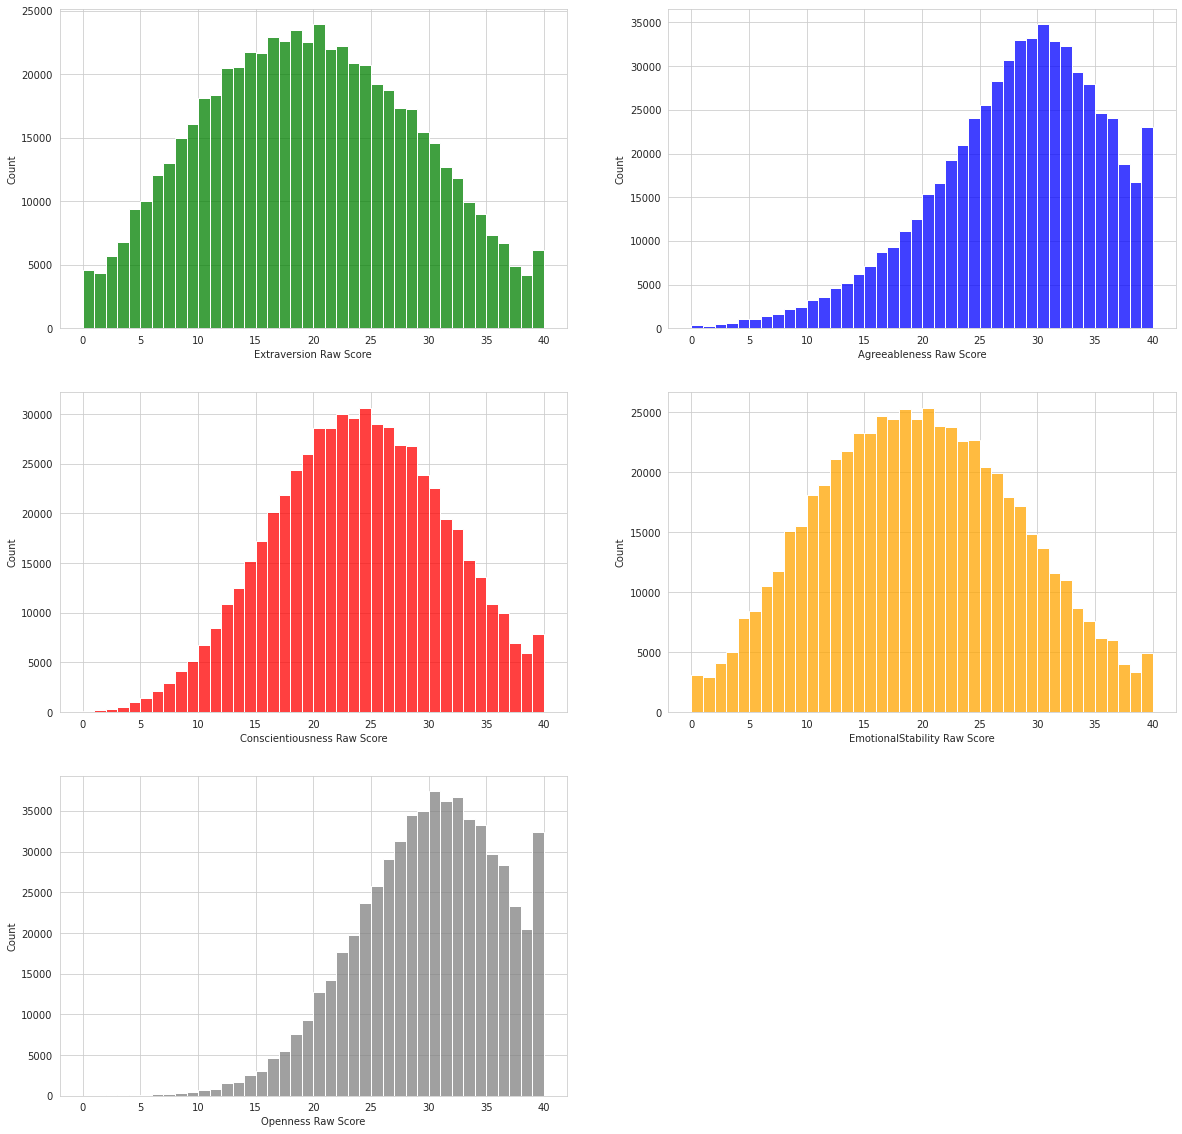

In [ ]:
colors_dict = {
    "Extraversion": "green", 
    "Agreeableness": "blue",
    "Conscientiousness":"red" ,
    "EmotionalStability": "orange" ,
    "Openness": "grey",    
} 
sns.set_style("whitegrid") 

def create_histogram(feature,ax):
    """To draw the distribution of the trait"""
    sns.histplot(x=feature,
             data=big_five_df,
             #kde=True,
             ax=ax,
             bins=40,
             color=colors_dict[feature])
    ax.set(xlabel = f"{feature} Raw Score") 
    
fig , ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
ax6.set_axis_off()

create_histogram("Extraversion",ax1)
create_histogram("Agreeableness",ax2)
create_histogram("Conscientiousness",ax3)
create_histogram("EmotionalStability",ax4)
create_histogram("Openness",ax5)

<p>From the  frequency distribution of the personality trait's raw scores, we can see the below observations</p>
<ul>
<li>The Raw scores of Extraversion and EmotionalStability are normally distributed, which suggests that most respondents have no strong tendencies toward these traits.</li> 
<li>The raw scores of Conscientiousness are slightly Skewed Right which suggests that more number of respondents are efficient and organized.</li>
<li>The Raw scores of Openness and Agreeableness are Skewed Right with an outlier at 40, which suggests that the respondents are more friendly, compassionate, and comfortable with abstract or creative ideas.</li>
</ul>


### Q2 : Is there any corrleation between raw scores of different Traits? 

In [ ]:
corrleation_df = scores_df.corr()
corrleation_df

,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,Openness
Extraversion,1.000000,0.305552,0.068311,0.224678,0.175060
Agreeableness,0.305552,1.000000,0.137175,0.040321,0.102047
Conscientiousness,0.068311,0.137175,1.000000,0.235187,0.054675
EmotionalStability,0.224678,0.040321,0.235187,1.000000,0.079021
Openness,0.175060,0.102047,0.054675,0.079021,1.000000


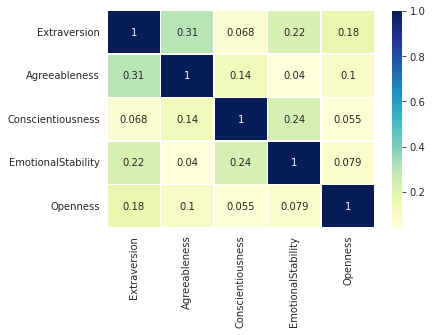

In [ ]:
sns.heatmap(data=corrleation_df,
            linewidths=.5,
            annot=True,
            cmap="YlGnBu")

- There are no strong correlations among the traits but we could observe that the Extraversion and Agreeableness are slightly correlated (0.30). Neuroticism (EmotionalStability) is also slightly correlated with Extraversion and Conscientiousness.

### Q3: what are the top 10 and bottom 10 countries that participated in the survey?

<p> Top 10 countries that participated in the survey.</p>

In [ ]:
country_table = country_table.sort_values(by="count",ascending=False)

In [ ]:
fig=px.bar(y=country_table["count"].head(10),x=country_table["country-short"].head(10))
fig.update_layout(
    title="Top 10 countries that participated in the survey",
    xaxis_title="Country",
    yaxis_title="No of responses"
)

- The Number of responses from the United states is very large compared to other countries. 

<p>The bottom 10 countries that are participated in the survey</p>

In [ ]:
fig=px.bar(y=country_table["count"].tail(10),x=country_table["country-short"].tail(10))
fig.update_layout(
    title="Bottom 10 countries that participated in the survey",
    xaxis_title="Country",
    yaxis_title="No of responses"
)

- The Number of responses of these countries are very low, we will comsider countries responses with more then 200 in the further analysis.


### Q4 : Are there any countries which are in the top 10 in all the Traits?

- Below is the function that plots the bar graph of top 10 countries for each trait.

In [ ]:
country_group = big_five_df.groupby(by="country-short")
def create_barplot_top10(trait,ax):
    country_group = big_five_df.groupby(by="country-short")
    trait_df = country_group[trait].agg(["size","mean"])
    trait_df = trait_df[trait_df["size"] > 500].sort_values(by="mean",ascending=False).head(10).reset_index().copy()
    trait_df["country-short"]= trait_df["country-short"].cat.remove_unused_categories()
    ax = sns.barplot(y="mean", 
                    x="country-short", 
                    data=trait_df,
                    ax=ax)
    ax.set_xlabel("Country",fontsize="x-large")
    ax.set_ylabel(f"Mean raw score of {trait}",fontsize="xx-large")
    ax.tick_params(axis='x', which='both', labelsize=15)
    ax.set_title(f"Plot between {trait} Mean raw score vs countries ",fontsize=15)


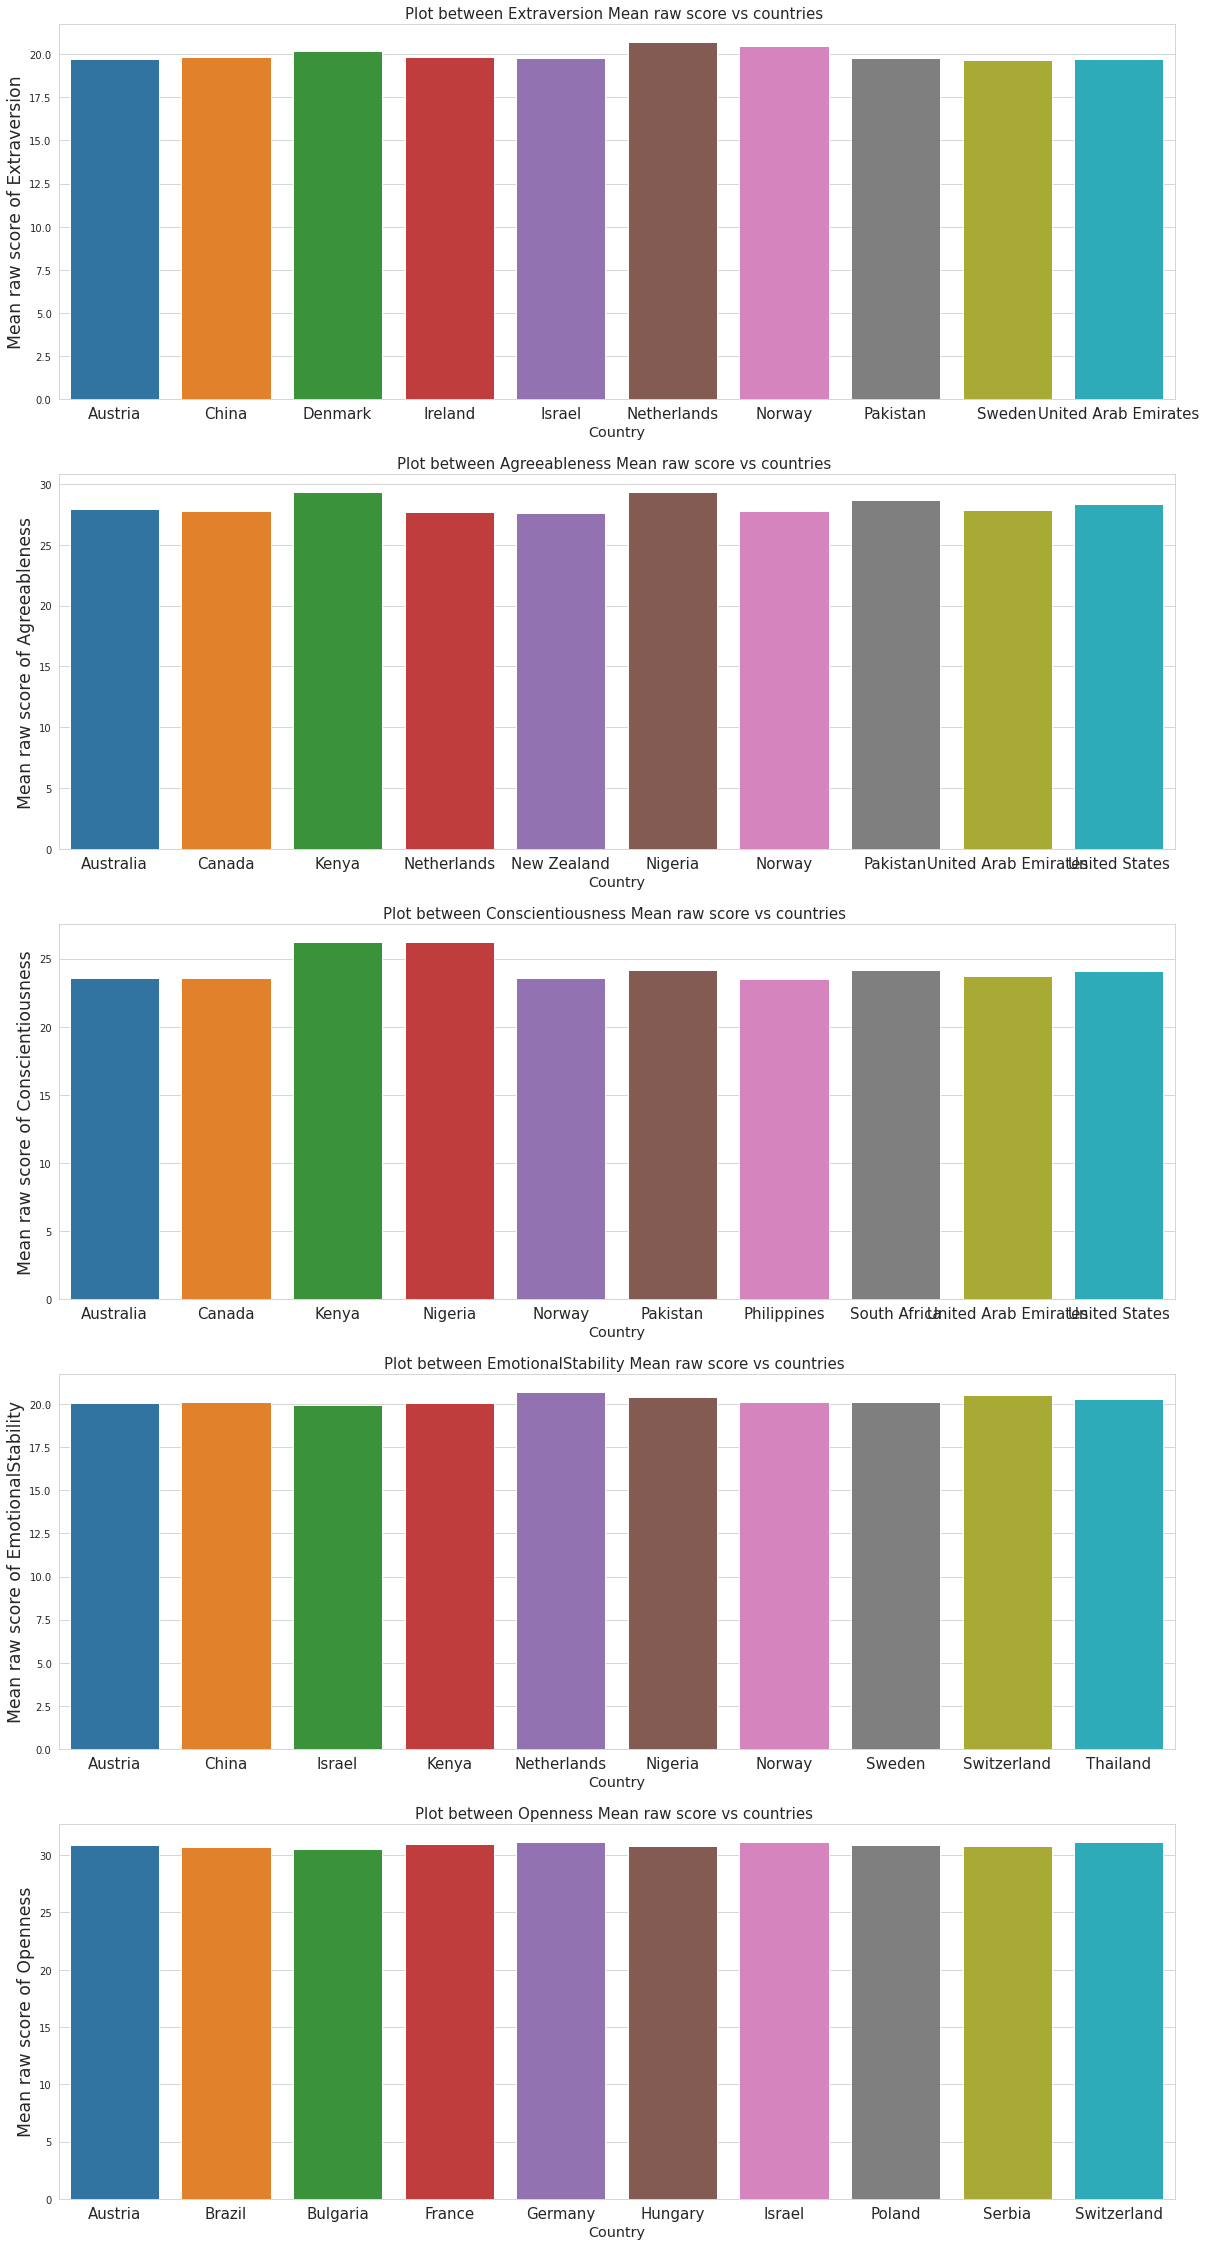

In [ ]:
fig , ((ax1,ax2,ax3,ax4,ax5)) = plt.subplots(nrows=5,figsize=(20,40))
create_barplot_top10("Extraversion",ax1)
create_barplot_top10("Agreeableness",ax2)
create_barplot_top10("Conscientiousness",ax3)
create_barplot_top10("EmotionalStability",ax4)
create_barplot_top10("Openness",ax5)
fig.show();

- Australia is the only country which has High Mean Raw scores for all the traits around the world.

### Q5: What is distribution of raw scores for different traits around the world? what does this show?



-  we will define the below function to draw the choropleth map that shows the mean distribution of raw scores around the world for different traits. 

In [ ]:
country_grouped_data = big_five_df.groupby(by="country-short")

triat_details_dict = {
    "Extraversion" :        ["Extraversion (Higher means more Extrovert)",'portland'],
    "Agreeableness":        ["Agreeableness (Higher means more friendly and compassionate)",'icefire'],
    "Conscientiousness":    ["Conscientiousness (Higher means more efficient and organised)","spectral"],
    "EmotionalStability":   ["EmotionalStability (Higher means more sensitive and nervous)","electric"],
    "Openness":             ["Openness (Higher means more are curious and inventive)","balance"]
}

def draw_choropleth(trait: str):
    trait_df = country_grouped_data[trait].agg(["size","mean"])
    trait_df = trait_df[trait_df["size"] > 200]
    fig = px.choropleth(trait_df, 
                    locations=trait_df.index,
                    color="mean", 
                    color_continuous_scale=triat_details_dict[trait][1], 
                    title=triat_details_dict[trait][0],
                    locationmode= 'country names' ,
                    projection='natural earth',
                    scope ='world') 
    fig.show();


In [ ]:
draw_choropleth("Extraversion")

- Some of the eastern countries are seemed to be Extrovert, but most of the western countries are extroverts, Brazil being the lowest among them. 
- The Netherlands seems to be more extroverted and Morocco seems to be less. 

In [ ]:
draw_choropleth("Agreeableness")

- Most of the South American countries seems to be more antagonistic than North American countries.

- Poland seems to be less compassionate. Kenya and the United States seem to be most compassionate followed by Australia and Canada. 


In [ ]:
draw_choropleth("Conscientiousness")

- Most of the Europen countries and south american countries are seems to be less organised then the north american and asian countries.

In [ ]:
draw_choropleth("EmotionalStability")

- North American countries are less emotionally stable than the south American countries. 
- The Netherlands seems to be the less Emotionally stable and Greece seems to more  Emotionally stable.  

In [ ]:
draw_choropleth("Openness")

- Western countries are more open to experience than eastern countries. 
- Switzerland seems to be more open to experience and malaysia seems to the least.

### Q6: How the personality traits varies between the continents?

- Below is the function to draw the distribution plot of different continents for different traits.

In [ ]:
continent_group = big_five_df.groupby(by="continent")
continent_df = continent_group[score_cols].mean()
continent_df = continent_df.melt(ignore_index=False).reset_index()
continent_df.columns = ["continent","Trait","mean"]

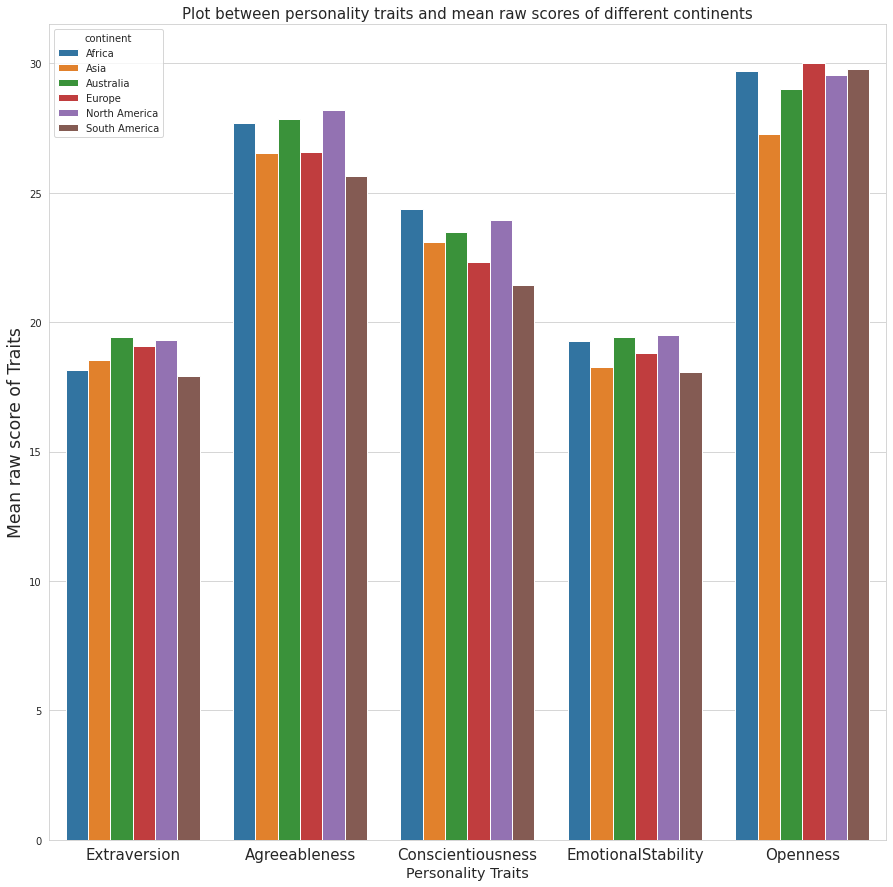

In [ ]:
fig , ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(x="Trait", 
                 y="mean", 
                 hue="continent", 
                 data=continent_df,
                 ax=ax)
ax.set_xlabel("Personality Traits",fontsize="x-large")
ax.set_ylabel("Mean raw score of Traits",fontsize="xx-large")
ax.tick_params(axis='x', which='both', labelsize=15)
ax.set_title("Plot between personality traits and mean raw scores of different continents",fontsize=15)
fig.show();

- Australia and North America seems to be standout across the all the traits, where as South America has the low raw score across most of the Traits.

### Q7: How much percentage of people answered Neutral, Agree and Disagree for more than 15 questions? :

In [ ]:
survey_ans_df = big_five_df[selected_cols[0:50]].apply(pd.Series.value_counts,axis=1).fillna(0)


In [ ]:
survey_ans_df.rename(columns=answers_dict,inplace=True)
survey_ans_df.sample(5)

,Disagree,Slightly Disagree,Neutral,Slightly Agree,Agree
56333,9.0,3.0,9.0,15.0,14.0
932552,13.0,11.0,7.0,13.0,6.0
247598,22.0,1.0,1.0,5.0,21.0
516443,12.0,7.0,8.0,9.0,14.0
263315,6.0,13.0,11.0,11.0,9.0


<p>Percentage of respondents who answed "Neutral" for more than 15 questions.</p>

In [ ]:
percentage_neutral = (survey_ans_df[survey_ans_df["Neutral"] > 15].shape[0]/survey_ans_df.shape[0])*100
percentage_neutral

17.062054988581156

- About 17% of respondents answered more than 15 question's as Neutral.

<p>Percentage of respondents who answed "Agree" for more than 15 questions.</p>

In [ ]:
percentage_agree = (survey_ans_df[survey_ans_df["Agree"] > 15].shape[0]/survey_ans_df.shape[0])*100
percentage_agree

15.125136748847613

- About 15% of respondents answered more than 15 question's as "Agree".

<p>Percentage of respondents who answed "Disagree" for more than 15 questions.</p>

In [ ]:
percentage_disagree = (survey_ans_df[survey_ans_df["Disagree"] > 15].shape[0]/survey_ans_df.shape[0])*100
percentage_disagree

5.8490696036930165

- Only 5.8% of respondents answered more than 15 question's as "Disagree".

<p>Percentage of respondents who answed "Slightly Disagree" or ""Slightly Agree"" for more than 15 questions.</p>

In [ ]:
percentage_slagree = (survey_ans_df[survey_ans_df["Slightly Disagree"] > 15].shape[0]/survey_ans_df.shape[0])*100
percentage_sldisagree = (survey_ans_df[survey_ans_df["Slightly Agree"] > 15].shape[0]/survey_ans_df.shape[0])*100

percentage_sl_agree_disagree = percentage_slagree + percentage_sldisagree
percentage_sl_agree_disagree

41.94673222769124

- About 42% of respondents answered more than 15 question's as "Slightly Agree" or "Slightly Disagree". 
- This shows that most of the respondents have no strong tendency towards any traits.

### Q8 : what are the questions that are answered as agreed or disagreed most across all the traits?

In [ ]:
answers_vals_df = big_five_df[selected_cols[0:50]].apply(pd.Series.value_counts,axis=0)
answers_vals_df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
1,157309,113933,49006,54199,62200,154544,149590,43157,104336,41058,...,20787,239369,12557,258726,8838,281600,7438,53646,9565,9028
2,123802,139127,123898,119931,113865,203295,141839,102687,136430,91625,...,53623,189295,41196,179168,34444,185825,30496,111364,29140,37383
3,165478,144837,160658,161234,138416,110286,112117,131214,123727,109243,...,138572,99221,96499,101834,158588,65830,98715,145608,66339,121624
4,109756,118452,163226,161031,174536,84861,113426,167586,143598,162762,...,206023,48949,188811,38136,238091,42033,241286,180319,204950,205174
5,38724,78720,98281,98674,106052,42083,78097,150425,86978,190381,...,176064,18235,256006,17205,155108,19781,217134,104132,285075,221860


<p>The personality question that most people answered as agree.</p>

In [ ]:
answers_vals_df.loc[5][answers_vals_df.loc[5] == answers_vals_df.loc[5].max()]

OPN9    285075
Name: 5, dtype: int64

In [ ]:
question_df[question_df["column-name"] == "OPN9"]

,column-name,question-text
48,OPN9,I spend time reflecting on things.


- The question that most respondents strongly agreed was "I spend time reflecting on things" which is a positive question. and it suggests that most of the respondents spend some time on reflecting things in their lives.

<p>The personality question that most people answered as Disagree.</p>

In [ ]:
answers_vals_df.loc[5][answers_vals_df.loc[1] == answers_vals_df.loc[1].max()]

OPN6    19781
Name: 5, dtype: int64

In [ ]:
question_df[question_df["column-name"] == "OPN6"]

,column-name,question-text
45,OPN6,I do not have a good imagination.


- The question that most respondents strongly disagreed was "I do not have a good imagination." which is a negative question. and it suggests that most of the respondents think that they have good imagination.

## Inferences and Conclusion

<p> The following inferences can be made from the above analysis of the Big Five Personality Test dataset :  </p>

- From the frequency distributions of raw scores for different Traits, we could observe normal distributions for Extraversion and EmotionalStability. whereas the distributions for Openness and Agreeableness Skewed Right.
- The Extraversion and Agreeableness are slightly correlated (0.30) and Neuroticism is also slightly correlated with Extraversion and Conscientiousness.
- The percentage of solid agreement or disagreement with the questions is relatively low among most of the Extraversion, and Neuroticism questions which is the opposite for Openness and Agreeableness. 
- About 25% of respondents remained neutral on one or more questions throughout the survey and about 17% answered as Neutral for more than 15 questions.
-  As the survey conducted in English, we could see most of the responses from North American and European countries, slightly Less number of responses are recorded from Asian and african countries. 
- There is a significant difference between western and eastern populations, The western countries seem more open to experience and organized than the eastern countries. 
- North American countries are less emotionally stable and more compassionate than south American countries.
- Australia is the only country which has High Mean Raw scores for all the personality traits around the world.

<strong>Conclusion: </strong> we have analyzed the responses to the various questions, geographical analysis, and comparisons have been made between the personality traits. it has given us the insights of the personalities around the world. Although it is also important to understand that each country or region has a different level of scale for these personalities. 

## References

- http://openpsychometrics.org/tests/IPIP-BFFM/ 
- https://www.kaggle.com/datasets/tunguz/big-five-personality-test 
- https://jovian.ai/learn/zero-to-data-analyst-bootcamp 
- https://taridwong.github.io/posts/2022-01-01-efacfa/ 
- https://psdlab.uoregon.edu/measuring-the-big-five-personality-domains/ 
- https://www.ibm.com/cloud/learn/exploratory-data-analysis 
- https://www.iban.com/country-codes 
- https://ipip.ori.org/newBigFive5broadKey.htm 
- https://plotly.com/python-api-reference/index.html 
- https://seaborn.pydata.org/ 
- https://pandas.pydata.org/
  


## Future work 

- We can further analyze the dataset for response times, time series, and many more by including socio-geographic information about the countries.
- we can perform a cluster analysis of the traits and determine which cluster people belong to based on the results.